In [1]:
%display latex

## Lie derivative computation

In [2]:
def lie(f,p,n=1):
    if n == 0:
        return p
    elif n > 0:
        return lie(f, vector(p.gradient()[-len(f):])*f, n - 1)
    else:
        raise Exception()

## Example 39

In [3]:
R.<x1,x2> = QQ[]
R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [4]:
f = vector([-2*x2, -3*x1**2 - 2*x1]); f

(-2*x2, -3*x1^2 - 2*x1)

In [5]:
p = x1**3 + x1**2 - x2**2

In [6]:
p.gradient()

[3*x1^2 + 2*x1, -2*x2]

In [7]:
lie(f,p)

0

### Using first integral to find invarients

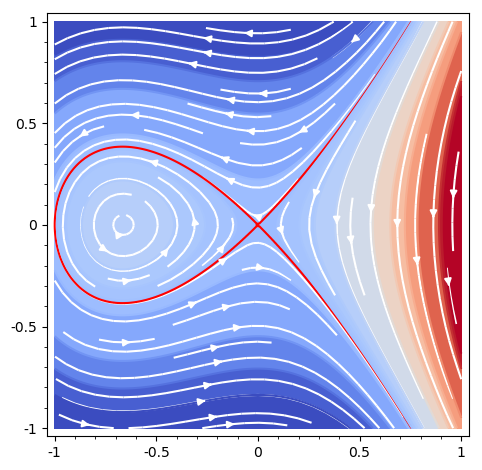

In [8]:
pl = Graphics()
pl += streamline_plot(tuple(f),(x1,-1,1),(x2,-1,1),color="white")
pl += implicit_plot(SR(p) == 0,(x1,-1,1),(x2,-1,1),color="red")
pl += contour_plot(SR(p),(x1,-1,1),(x2,-1,1), fill=True, cmap="coolwarm",
                   contours=[-0.7,-0.5,-0.3,-0.05,0.01,0.05,0.1,0.2,0.5,0.7,0.9,1.1,1.5,1.6])
#pl += implicit_plot(p == 0.06,(x_1,-1,1),(x_2,-1,1),color="yellow")
#for k in [0.3,0.7,2,3,4,5]:
#    pl += implicit_plot(p == k,(x_1,-1,1),(x_2,-1,1),color="yellow")
pl

In [9]:
(SR(p) == 0.5).solve([SR(x1),SR(x2)])

[[x1 == r1, x2 == sqrt(r1^3 + r1^2 - 1/2)], [x1 == r2, x2 == -sqrt(r2^3 + r2^2 - 1/2)]]

### Singular locus

In [10]:
qf=qepcad_formula

In [11]:
diff(p,x1)

3*x1^2 + 2*x1

In [12]:
F = qf.exists([x1,x2], qf.and_(SR(p) == 0,
                               SR(diff(p,x1)) == 0,
                               SR(diff(p,x2)) == 0))
F

(E x1)(E x2)[x1^3 + x1^2 - x2^2 = 0 /\ 3 x1^2 + 2 x1 = 0 /\ -2 x2 = 0]

In [13]:
qepcad(F)

TRUE

In [14]:
def SL(p):
    return solve([SR(p) == 0] + [SR(d) == 0 for d in p.gradient()],
                 map(SR,p.variables()))

In [15]:
SL(p)

[[x1 == 0, x2 == 0]]

In [16]:
f.substitute(x1=0,x2=0)

(0, 0)

There is no flow at the origin and hence by $\mathrm{Lie}^\circ$, $p = 0$ is an invarient set.

### Square free reduction

In [17]:
p/gcd([p, diff(p, x1), diff(p, x2)])

x1^3 + x1^2 - x2^2

In [18]:
def SF(p):
    return SR(p/gcd([p] + p.gradient()))

In [19]:
SF(p)

x1^3 + x1^2 - x2^2

In [20]:
SF(x1**2 - 6*x1 + 9)

x1 - 3

## Example 58

In [21]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [22]:
f = vector([3*(x1**2 - 4), 3 - x2**2 + x1*x2]); f

(3*x1^2 - 12, x1*x2 - x2^2 + 3)

In [23]:
p = x2^4 + 2*x1*x2**3 + 6*x2**2 + 2*x1*x2 + x1**2 - 3; p

2*x1*x2^3 + x2^4 + x1^2 + 2*x1*x2 + 6*x2^2 - 3

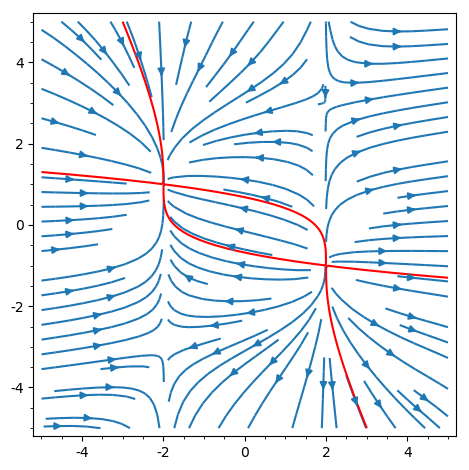

In [24]:
g = Graphics()
g += streamline_plot(map(SR,f),(x1,-5,5),(x2,-5,5))
g += implicit_plot(SR(p) == 0, (x1,-5,5),(x2,-5,5),color="red")
g

In [25]:
lie(f,p)

12*x1^2*x2^3 - 2*x1*x2^4 - 4*x2^5 + 6*x1^3 + 8*x1^2*x2 + 28*x1*x2^2 - 24*x2^3 - 18*x1 + 12*x2

In [26]:
lie(f,p).quo_rem(p)

(6*x1 - 4*x2, 0)

In [27]:
darboux = [x2**4-6*x2**2-4*x1*x2-3,
           x2**4+2*x1*x2**3+6*x2**2+2*x1*x2+x1**2-3,
           x1**2-4]
darboux

[x2^4 - 4*x1*x2 - 6*x2^2 - 3,
 2*x1*x2^3 + x2^4 + x1^2 + 2*x1*x2 + 6*x2^2 - 3,
 x1^2 - 4]

In [28]:
[lie(f,q).quo_rem(q) for q in darboux]

[(4*x1 - 4*x2, 0), (6*x1 - 4*x2, 0), (6*x1, 0)]

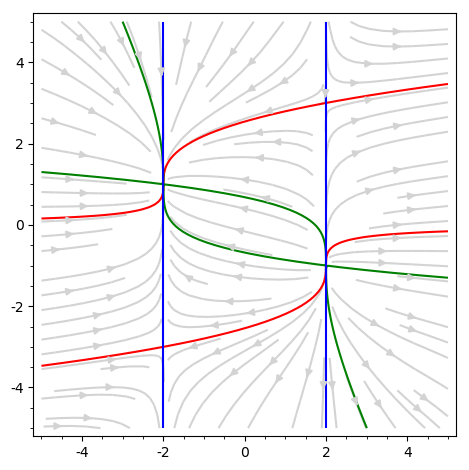

In [29]:
g = Graphics()
g += streamline_plot(map(SR,f),(x1,-5,5),(x2,-5,5), color="lightgrey")
colors = ["red","green","blue"]
for q,c in zip(darboux,colors):
    g += implicit_plot(SR(q) == 0, (x1,-5,5),(x2,-5,5),color=c)
g

We also have a rational first integral:

In [30]:
I = darboux[2] * darboux[0]**3 / darboux[1]**3

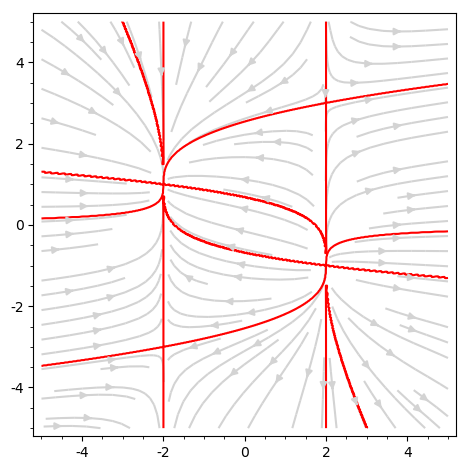

In [31]:
g = Graphics()
g += streamline_plot(map(SR,f),(x1,-5,5),(x2,-5,5), color="lightgrey")
g += implicit_plot(SR(I) == 0, (x1,-5,5),(x2,-5,5),color="red", plot_points = 700)
g

### Finding rational first integral via quantifier elimination

In [32]:
as_ =var("a1,a2,a3")

In [33]:
expr = sum(a*(lie(f,d)/d) for a,d in zip(as_,darboux)); expr

2*a2*(3*x1 - 2*x2) + 4*a1*(x1 - x2) + 6*a3*x1

In [34]:
F = qf.forall(R.gens(), expr == 0); F

(A x1)(A x2)[2 a2 (3 x1 - 2 x2) + 4 a1 (x1 - x2) + 6 a3 x1 = 0]

In [35]:
qff = qepcad(F); qff

a2 + a1 = 0 /\ 3 a3 + 3 a2 + 2 a1 = 0

In [36]:
import re

In [37]:
conjuncts = [eval(re.sub(r'([0-9]+) ([a-z])', r"\1*\2", e))
             for e in str(qff).replace("=", "==").split("/\\")]
conjuncts

[a1 + a2 == 0, 2*a1 + 3*a2 + 3*a3 == 0]

In [38]:
solve(conjuncts+[a3==1], as_)

[[a1 == 3, a2 == -3, a3 == 1]]

This implies that the first integral is indeed $I = J_3J_1^3J_2^{-3}$.

### Finding first integral via linear algebra

In [39]:
n = 2

In [40]:
darbouxrem = [lie(f,d)//d for d in darboux];darbouxrem

[4*x1 - 4*x2, 6*x1 - 4*x2, 6*x1]

In [41]:
V = VectorSpace(QQ, n*n); V

Vector space of dimension 4 over Rational Field

In [42]:
darbouxrem[0].coefficients(), darbouxrem[0].monomials()

([4, -4], [x1, x2])

In [43]:
bs = [x1**i*x2**j for i in range(n) for j in range(n)]; bs

[1, x2, x1, x1*x2]

In [44]:
bv = dict((x1**i*x2**j, V.basis()[n*i + j])
          for i in range(n) for j in range(n))
bv

{1: (1, 0, 0, 0), x2: (0, 1, 0, 0), x1: (0, 0, 1, 0), x1*x2: (0, 0, 0, 1)}

In [45]:
def to_vect(p):
    return sum(c*bv[m] for c,m in zip(p.coefficients(), p.monomials()))

In [46]:
to_vect(darbouxrem[0])

(0, -4, 4, 0)

In [47]:
A = matrix(QQ, map(to_vect, darbouxrem)); A

[ 0 -4  4  0]
[ 0 -4  6  0]
[ 0  0  6  0]

In [48]:
A.kernel()

Vector space of degree 3 and dimension 1 over Rational Field
Basis matrix:
[  1  -1 1/3]

## Example 62 (vector field)

In [49]:
R.<x1,x2,x3> = QQ[]; R

Multivariate Polynomial Ring in x1, x2, x3 over Rational Field

In [50]:
f = vector([x2 + x3, 2*x1*x2 + 2*x1*x3, -x3**3 -x2*x3**2]); f

(x2 + x3, 2*x1*x2 + 2*x1*x3, -x2*x3^2 - x3^3)

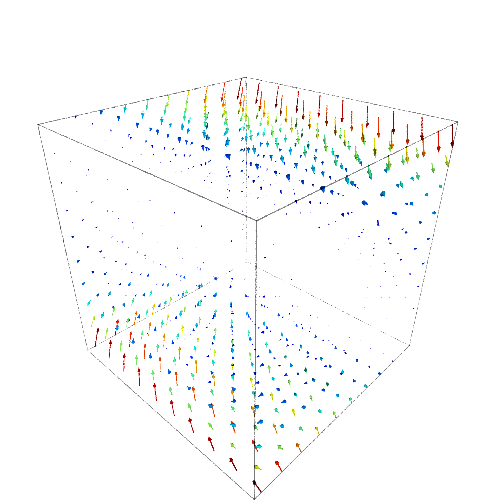

In [51]:
plot_vector_field3d(f, (x1,-5,5), (x2,-5,5), (x3,-5,5),
                    plot_points=10).show(viewer="tachyon")

In [52]:
p = (x1*x3 + x3 - 1)**2 + (x2 - x1**2)**2; p

x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1

In [53]:
lie(f,p)

-2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2

### $p$ is not a a Darboux polynomial 

In [54]:
lie(f,p) not in ideal(p)

True

### $p$ satisfied dynamical radical invarient condition

In [55]:
L0,L1,L2 = [lie(f,p,n) for n in range(3)]

In [56]:
L0

x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1

In [57]:
L1

-2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2

In [58]:
L2

6*x1^2*x2^2*x3^4 + 14*x1^2*x2*x3^5 + 8*x1^2*x3^6 - 4*x1^3*x2*x3^3 - 4*x1^3*x3^4 + 12*x1*x2^2*x3^4 + 28*x1*x2*x3^5 + 16*x1*x3^6 - 8*x1^2*x2*x3^3 - 12*x1*x2^2*x3^3 - 8*x1^2*x3^4 - 28*x1*x2*x3^4 + 6*x2^2*x3^4 - 16*x1*x3^5 + 14*x2*x3^5 + 8*x3^6 + 8*x1^2*x2*x3^2 + 8*x1^2*x3^3 - 4*x1*x2*x3^3 - 12*x2^2*x3^3 - 4*x1*x3^4 - 28*x2*x3^4 - 16*x3^5 + 8*x1*x2*x3^2 + 6*x2^2*x3^2 + 8*x1*x3^3 + 14*x2*x3^3 + 8*x3^4 - 4*x1*x2*x3 - 4*x1*x3^2

In [59]:
I = ideal([L0,L1]);I

Ideal (x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1, -2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2) of Multivariate Polynomial Ring in x1, x2, x3 over Rational Field

In [60]:
L2 in I

True

In [61]:
L2.lift(I)

[0, -3*x2*x3 - 4*x3^2 + 2*x1]

In [62]:
vector(L2.lift(I))*vector([L0,L1]) == L2

True

## $\mathrm{DRI}$ decision procedure

In [63]:
def dri(f,p,N, verbose=False):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = []
    for n in range(0,N+1):
        d = lie(f,d) if n > 0 else p
        if verbose:
            print "I[{}] = <{}>".format(n, ', '.join(map(str, L)))
        if d in R.ideal(L):
            F = qf.forall(f[0].parent().gens()[-len(f):],
                          qf.implies(SR(p) == 0,
                                     qf.and_(*(SR(l) == 0 for l in L))))
            if verbose:
                print F
            ans = qepcad(F)
            if ans == "TRUE":
                return True
            elif ans == "FALSE":
                return False
            else:
                return ans
        L.append(d)
    raise Exception("Did not terminate")

In [64]:
dri(f,p,4, verbose=True)

I[0] = <>
I[1] = <x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1>
I[2] = <x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1, -2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2>
(A x1)(A x2)(A x3)[x1^4 + x1^2 x3^2 - 2 x1^2 x2 + 2 x1 x3^2 + x2^2 - 2 x1 x3 + x3^2 - 2 x3 + 1 = 0 ==> [x1^4 + x1^2 x3^2 - 2 x1^2 x2 + 2 x1 x3^2 + x2^2 - 2 x1 x3 + x3^2 - 2 x3 + 1 = 0 /\ -2 x1^2 x2 x3^3 - 2 x1^2 x3^4 - 4 x1 x2 x3^3 - 4 x1 x3^4 + 4 x1 x2 x3^2 + 4 x1 x3^3 - 2 x2 x3^3 - 2 x3^4 + 4 x2 x3^2 + 4 x3^3 - 2 x2 x3 - 2 x3^2 = 0]]


True

### Example 63

In [65]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [66]:
f = vector([x2,x1]); f

(x2, x1)

In [67]:
p = x1**2 + x2**2

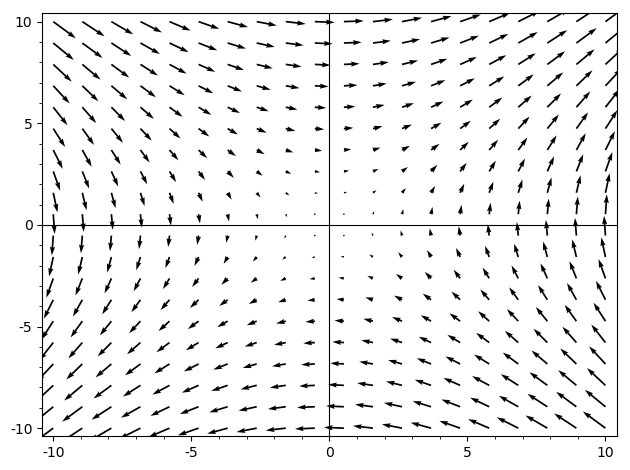

In [68]:
plot_vector_field(f, (x1,-10,10), (x2,-10,10))

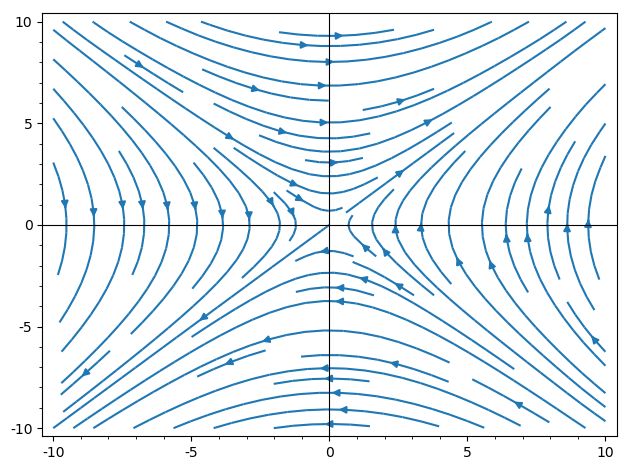

In [69]:
streamline_plot(tuple(f), (x1,-10,10), (x2,-10,10))

In [70]:
dri(f,p,4, verbose=True)

I[0] = <>
I[1] = <x1^2 + x2^2>
I[2] = <x1^2 + x2^2, 4*x1*x2>
(A x1)(A x2)[x1^2 + x2^2 = 0 ==> [x1^2 + x2^2 = 0 /\ 4 x1 x2 = 0]]


True

The scalar field $p$ encodes the point $(0,0)$ as $\ker p = p^{-1}(0) = \{0\}$. Therefore, this shows the origin is invariant.

### Should return false for a non-invariant point

In [71]:
q = (x1-2)**2 + (x2-3)**2; q

x1^2 + x2^2 - 4*x1 - 6*x2 + 13

In [72]:
plot3d(SR(q), (x1,0,5), (x2,0,5), opacity=0.9).show(viewer="threejs", aspect_ratio=(1,1,0.1))

Graphics3d Object

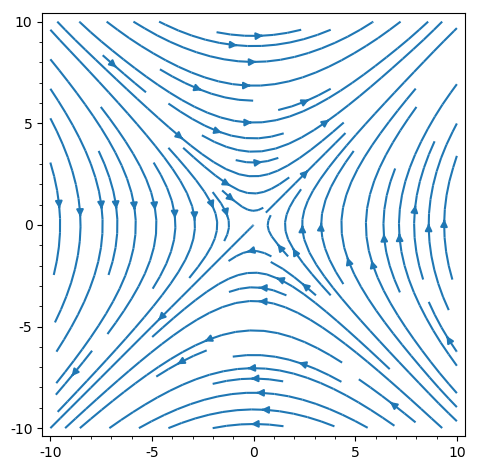

In [73]:
g = Graphics()
g += streamline_plot(tuple(f), (x1,-10,10), (x2,-10,10))
g += implicit_plot(SR(q) == 0, (x1,-10,10), (x2,-10,10), color="red")
g

In [74]:
dri(f,q,6,verbose=True)

I[0] = <>
I[1] = <x1^2 + x2^2 - 4*x1 - 6*x2 + 13>
I[2] = <x1^2 + x2^2 - 4*x1 - 6*x2 + 13, 4*x1*x2 - 6*x1 - 4*x2>
I[3] = <x1^2 + x2^2 - 4*x1 - 6*x2 + 13, 4*x1*x2 - 6*x1 - 4*x2, 4*x1^2 + 4*x2^2 - 4*x1 - 6*x2>
(A x1)(A x2)[x1^2 + x2^2 - 4 x1 - 6 x2 + 13 = 0 ==> [x1^2 + x2^2 - 4 x1 - 6 x2 + 13 = 0 /\ 4 x1 x2 - 6 x1 - 4 x2 = 0 /\ 4 x1^2 + 4 x2^2 - 4 x1 - 6 x2 = 0]]


False

In [75]:
lie(f,q,2)

4*x1^2 + 4*x2^2 - 4*x1 - 6*x2

In [76]:
lie(f,q,2) in ideal([lie(f,q,0), lie(f,q,1)])

False

In [77]:
lie(f,q,3) in ideal([lie(f,q,0), lie(f,q,1), lie(f,q,2)])

True

In [78]:
lie(f,q,4) in ideal([lie(f,q,0), lie(f,q,1), lie(f,q,2), lie(f,q,3)])

True

In [79]:
F = qf.forall([x1,x2],
              qf.implies(SR(p == 0),
                         qf.and_(SR(lie(f,q,1)) == 0,
                                 SR(lie(f,q,2)) == 0)))
F

(A x1)(A x2)[0 = 0 ==> [4 x1 x2 - 6 x1 - 4 x2 = 0 /\ 4 x1^2 + 4 x2^2 - 4 x1 - 6 x2 = 0]]

In [80]:
qepcad(F)

FALSE

## $\mathrm{DRI}_{\wedge}$ decision procedure

The improved decision procedure for a conjunction $p_1 \wedge p_2 \wedge \ldots \wedge p_k$, consists of checking whether $\mathcal L^N_f(p_i) \in I$ for some $N$, where,
$$
I = \langle
p_1,\ldots,p_k,
\mathcal L_f(p_1),\ldots, \mathcal L_f(p_k),
\ldots
\mathcal L_f^{N-1}(p_1),\ldots, \mathcal L_f^{N-1}(p_k)
\rangle
$$
and also that we have the inclusion,
$$
\mathcal V_{\mathbb R}(p_1,\ldots,p_k) \subseteq \mathcal V_{\mathbb R}(I).
$$
(this is checked via Quantifier Elimination)

### Manual check

In [81]:
ps = [x1, x2]
ps

[x1, x2]

In [82]:
Ls = [lie(f,p) for p in ps]
Ls

[x2, x1]

In [83]:
LLs = [lie(f,p) for p in Ls]
LLs

[x1, x2]

In [84]:
ips = [ps[0],ps[1],Ls[0],Ls[1]]

In [85]:
I = R.ideal(ips); I

Ideal (x1, x2, x2, x1) of Multivariate Polynomial Ring in x1, x2 over Rational Field

In [86]:
all(p in I for p in LLs)

True

In [87]:
F = qf.forall([x1,x2],
              qf.implies(qf.and_(SR(ps[0]) == 0, SR(ps[1]) == 0),
                         qf.and_(*(SR(i) == 0 for i in ips))))
F

(A x1)(A x2)[[x1 = 0 /\ x2 = 0] ==> [x1 = 0 /\ x2 = 0 /\ x2 = 0 /\ x1 = 0]]

In [88]:
qepcad(F) == "TRUE"

True

### General procedure

In [89]:
def dri2(f,ps,N,verbose=True):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = []
    xs = ps[0].parent().gens()
    for n in range(0,N+1):
        ds = [lie(f,d) for d in ds] if n > 0 else ps
        ips = sum(L, [])
        I = R.ideal(ips)
        if verbose:
            print "L[{}] = {}".format(n,ds)
            print "I = <{}>".format(', '.join(map(str, ips)))
        if all(d in I for d in ds):
            if verbose:
                print "Lie derivatives in ideal for n = {}".format(n)
            F = qf.forall(xs,
                  qf.implies(qf.and_(*(SR(p) == 0 for p in ps)),
                             qf.and_(*(SR(i) == 0 for i in ips))))
            if verbose:
                print F
            q = qepcad(F)
            if q == "TRUE":
                return True
            elif q == "FALSE":
                return False
            else:
                return q
        L.append(ds)
    return False

### Example 63

In [90]:
dri2(f,[x1,x2],4)

L[0] = [x1, x2]
I = <>
L[1] = [x2, x1]
I = <x1, x2>
Lie derivatives in ideal for n = 1
(A x1)(A x2)[[x1 = 0 /\ x2 = 0] ==> [x1 = 0 /\ x2 = 0]]


True

### Should return false for a non-invariant point

In [91]:
dri2(f,[x1 - 2, x2 - 3],6,verbose=True)

L[0] = [x1 - 2, x2 - 3]
I = <>
L[1] = [x2, x1]
I = <x1 - 2, x2 - 3>
L[2] = [x1, x2]
I = <x1 - 2, x2 - 3, x2, x1>
Lie derivatives in ideal for n = 2
(A x1)(A x2)[[x1 - 2 = 0 /\ x2 - 3 = 0] ==> [x1 - 2 = 0 /\ x2 - 3 = 0 /\ x2 = 0 /\ x1 = 0]]


False

## Liu, Zhan, & Zhao decision procedure procedure for semi-algebraic sets

In [92]:
def saturating_ideal(f,p):
    print "==="
    N = 0
    L = []
    while True:
        # Loop guaranteed to terminate by the Hilbert basis theorem
        l = lie(f, L[-1]) if N > 0 else p
        N += 1
        I = R.ideal(L)
        print "I     = <{}>".format(', '.join(map(str, L)))
        print "basis = <{}>".format(', '.join(map(str, I.groebner_basis())))
        print "L[{}]  = {}".format(N, l)
        if l in I:
            print "==="
            return L
        L.append(l)
        print "---"

In [93]:
saturating_ideal(f,p)

===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = x2
---
I     = <x1, x2>
basis = <x1, x2>
L[3]  = x1
===


[x1, x2]

In [94]:
g = vector([-2*x2,x1**2]); g

(-2*x2, x1^2)

In [95]:
q = x1 + x2**2

In [96]:
saturating_ideal(g,q)

===
I     = <>
basis = <0>
L[1]  = x2^2 + x1
---
I     = <x2^2 + x1>
basis = <x2^2 + x1>
L[2]  = 2*x1^2*x2 - 2*x2
---
I     = <x2^2 + x1, 2*x1^2*x2 - 2*x2>
basis = <x1^3 - x1, x1^2*x2 - x2, x2^2 + x1>
L[3]  = 2*x1^4 - 8*x1*x2^2 - 2*x1^2
---
I     = <x2^2 + x1, 2*x1^2*x2 - 2*x2, 2*x1^4 - 8*x1*x2^2 - 2*x1^2>
basis = <x1, x2>
L[4]  = -32*x1^3*x2 + 16*x2^3 + 8*x1*x2
===


[x2^2 + x1, 2*x1^2*x2 - 2*x2, 2*x1^4 - 8*x1*x2^2 - 2*x1^2]

In [97]:
saturating_ideal(vector([x1,x1]),x1^2)

===
I     = <>
basis = <0>
L[1]  = x1^2
---
I     = <x1^2>
basis = <x1^2>
L[2]  = 2*x1^2
===


[x1^2]

In [98]:
def or_(ys):
    xs = list(ys)
    return xs[0] if len(xs) == 1 else qf.or_(*xs)
def and_(ys):
    xs = list(ys)
    return xs[0] if len(xs) == 1 else qf.and_(*xs)

In [99]:
def in_lt(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) < 0])
                  for n in range(len(ips)))
def in_lte(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        [and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) < 0])
            for n in range(len(ips)-1)]
        +
        [and_([SR(d) == 0 for d in ips[0:-1]] + [SR(ips[-1]) <= 0])])
def in_gt(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) > 0])
                  for n in range(len(ips)))
def in_gte(f,p):
    ips = saturating_ideal(f,p)
    return or_(
        [and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) > 0])
            for n in range(len(ips)-1)]
        +
        [and_([SR(d) == 0 for d in ips[0:-1]] + [SR(ips[-1]) >= 0])])

#def in_gt(f,p):
#    return in_lt(f,-p)
#def in_gte(f,p):
#    return in_lte(f,-p)

In [100]:
in_lt(f,p)

===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = x2
---
I     = <x1, x2>
basis = <x1, x2>
L[3]  = x1
===


[x1 < 0 \/ [x1 = 0 /\ x2 < 0]]

In [101]:
in_lte(f,p)

===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = x2
---
I     = <x1, x2>
basis = <x1, x2>
L[3]  = x1
===


[x1 < 0 \/ [x1 = 0 /\ x2 <= 0]]

In [102]:
in_lt(g,q)

===
I     = <>
basis = <0>
L[1]  = x2^2 + x1
---
I     = <x2^2 + x1>
basis = <x2^2 + x1>
L[2]  = 2*x1^2*x2 - 2*x2
---
I     = <x2^2 + x1, 2*x1^2*x2 - 2*x2>
basis = <x1^3 - x1, x1^2*x2 - x2, x2^2 + x1>
L[3]  = 2*x1^4 - 8*x1*x2^2 - 2*x1^2
---
I     = <x2^2 + x1, 2*x1^2*x2 - 2*x2, 2*x1^4 - 8*x1*x2^2 - 2*x1^2>
basis = <x1, x2>
L[4]  = -32*x1^3*x2 + 16*x2^3 + 8*x1*x2
===


[x2^2 + x1 < 0 \/ [x2^2 + x1 = 0 /\ 2 x1^2 x2 - 2 x2 < 0] \/ [x2^2 + x1 = 0 /\ 2 x1^2 x2 - 2 x2 = 0 /\ 2 x1^4 - 8 x1 x2^2 - 2 x1^2 < 0]]

In [103]:
in_lte(g,q)

===
I     = <>
basis = <0>
L[1]  = x2^2 + x1
---
I     = <x2^2 + x1>
basis = <x2^2 + x1>
L[2]  = 2*x1^2*x2 - 2*x2
---
I     = <x2^2 + x1, 2*x1^2*x2 - 2*x2>
basis = <x1^3 - x1, x1^2*x2 - x2, x2^2 + x1>
L[3]  = 2*x1^4 - 8*x1*x2^2 - 2*x1^2
---
I     = <x2^2 + x1, 2*x1^2*x2 - 2*x2, 2*x1^4 - 8*x1*x2^2 - 2*x1^2>
basis = <x1, x2>
L[4]  = -32*x1^3*x2 + 16*x2^3 + 8*x1*x2
===


[x2^2 + x1 < 0 \/ [x2^2 + x1 = 0 /\ 2 x1^2 x2 - 2 x2 < 0] \/ [x2^2 + x1 = 0 /\ 2 x1^2 x2 - 2 x2 = 0 /\ 2 x1^4 - 8 x1 x2^2 - 2 x1^2 <= 0]]

In [104]:
def in_cnf(f,cnf):
    # cnf is a disjunction of conjunctions of inequalities,
    # represented as a list of lists of tuples (s,p)
    # where s is "LT" or "LEQ" and p is a scalar field
    return or_(
        and_(
            in_lt(f,p) if s == "LT" else
            in_lte(f,p) if s == "LEQ" else 
            in_gt(f,p) if s == "GT" else
            in_gte(f,p)
            for (s,p) in conjunct
        ) for conjunct in cnf
    )

In [105]:
def from_cnf(cnf):
    # cnf is a disjunction of conjunctions of inequalities,
    # represented as a list of lists of tuples (s,p)
    # where s is "LT" or "LEQ" and p is a scalar field
    return or_(
        and_(
            SR(p) == 0 if s == "EQ" else
            SR(p) < 0 if s == "LT" else
            SR(p) <= 0 if s == "LEQ" else 
            SR(p) > 0 if s == "GT" else
            SR(p) >= 0
            for (s,p) in conjunct
        ) for conjunct in cnf
    )

In [106]:
def lzz(f,h,p,s=[],xys=None,debug=False):
    if xys is None:
        xys = f[0].parent().gens()[-len(f):]
    print "xys =", xys
    H = [] if h == [] else [from_cnf(h)]
    IHp = [] if h == [] else [in_cnf(f, h)]
    IHm = [] if h == [] else [in_cnf(-f, h)]
    P = from_cnf(p)
    F = qf.forall(xys, and_(
        ([qf.implies(from_cnf(s), P)] if s else [])
        +
        [qf.implies(and_([P] + H + IHp),
                    in_cnf(f,p)),
         qf.implies(and_([qf.not_(P)] + H + IHm),
                   qf.not_(in_cnf(-f,p)))]
    ))
    print(F)
    qcd = qepcad(F)
    if debug:
        return F, qcd
    return (True if qcd == "TRUE" else
            False if qcd == "FALSE" else
            qcd)

### Example 101

In [107]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [108]:
f = vector([-1,-x2]); f

(-1, -x2)

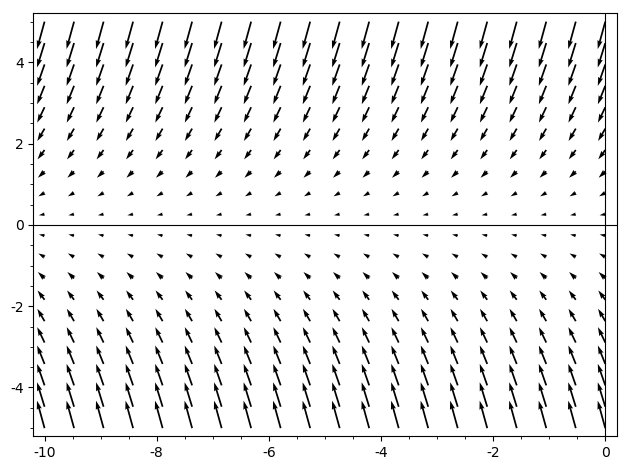

In [109]:
plot_vector_field(f, (x1, -10, 0), (x2, -5, 5))

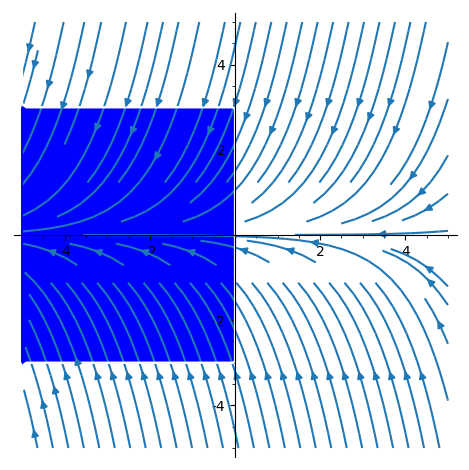

In [110]:
g = Graphics()
g += streamline_plot(tuple(f), (x1, -5, 5), (x2, -5, 5))
g += region_plot([SR(x1) + 5 >= 0, SR(x2) + 3 >= 0,
                  SR(x2) - 3 <= 0, SR(x1) <= 0],
                 (x1, -5, 5), (x2, -5, 5))
g

In [111]:
h = [[("GEQ", x1+5)]]; h

[[('GEQ', x1 + 5)]]

In [112]:
s = [[("GEQ", x2 + 3), ("LEQ", x2-3),
      ("GEQ", x1 + 5), ("LEQ", x1)]]
s

[[('GEQ', x2 + 3), ('LEQ', x2 - 3), ('GEQ', x1 + 5), ('LEQ', x1)]]

In [113]:
from_cnf(s)

[x2 + 3 >= 0 /\ x2 - 3 <= 0 /\ x1 + 5 >= 0 /\ x1 <= 0]

In [114]:
in_cnf(f,s)

===
I     = <>
basis = <0>
L[1]  = x2 + 3
---
I     = <x2 + 3>
basis = <x2 + 3>
L[2]  = -x2
---
I     = <x2 + 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x2 - 3
---
I     = <x2 - 3>
basis = <x2 - 3>
L[2]  = -x2
---
I     = <x2 - 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = -1
---
I     = <x1 + 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = -1
---
I     = <x1, -1>
basis = <1>
L[3]  = 0
===


[[x2 + 3 > 0 \/ [x2 + 3 = 0 /\ -x2 >= 0]] /\ [x2 - 3 < 0 \/ [x2 - 3 = 0 /\ -x2 <= 0]] /\ [x1 + 5 > 0 \/ [x1 + 5 = 0 /\ -1 >= 0]] /\ [x1 < 0 \/ [x1 = 0 /\ -1 <= 0]]]

In [115]:
lzz(f,h,s)

xys = (x1, x2)
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = -1
---
I     = <x1 + 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = 1
---
I     = <x1 + 5, 1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x2 + 3
---
I     = <x2 + 3>
basis = <x2 + 3>
L[2]  = -x2
---
I     = <x2 + 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x2 - 3
---
I     = <x2 - 3>
basis = <x2 - 3>
L[2]  = -x2
---
I     = <x2 - 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = -1
---
I     = <x1 + 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = -1
---
I     = <x1, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x2 + 3
---
I     = <x2 + 3>
basis = <x2 + 3>
L[2]  = x2
---
I     = <x2 + 3, x2>
basis = <1>
L[3]  = x2
===
==

True

## LZZ example 8

In [116]:
R.<a,x,y> = QQ[]; R

Multivariate Polynomial Ring in a, x, y over Rational Field

In [117]:
f = vector([-2*y, x**2]); f

(-2*y, x^2)

In [118]:
h = -x - y**2; h

-y^2 - x

In [119]:
H = [[('GEQ', h)]]; H

[[('GEQ', -y^2 - x)]]

In [120]:
p = a*y*(x-y); p

a*x*y - a*y^2

In [121]:
p.gradient()[-len(f):]

[a*y, a*x - 2*a*y]

In [122]:
ST = [[('EQ', x + 1), ('EQ', y - QQ(1/2))],
      [('EQ', x + QQ(1/2)), ('EQ', y + QQ(0.6))]]; ST

[[('EQ', x + 1), ('EQ', y - 1/2)], [('EQ', x + 1/2), ('EQ', y + 3/5)]]

In [123]:
P = [[('GEQ', p)]]; P

[[('GEQ', a*x*y - a*y^2)]]

In [124]:
in_cnf(f,P)

===
I     = <>
basis = <0>
L[1]  = a*x*y - a*y^2
---
I     = <a*x*y - a*y^2>
basis = <a*x*y - a*y^2>
L[2]  = a*x^3 - 2*a*x^2*y - 2*a*y^2
---
I     = <a*x*y - a*y^2, a*x^3 - 2*a*x^2*y - 2*a*y^2>
basis = <a*y^4 + 2*a*y^3, a*x^3 - 2*a*y^3 - 2*a*y^2, a*x*y - a*y^2>
L[3]  = -2*a*x^4 - 10*a*x^2*y + 8*a*x*y^2
---
I     = <a*x*y - a*y^2, a*x^3 - 2*a*x^2*y - 2*a*y^2, -2*a*x^4 - 10*a*x^2*y + 8*a*x*y^2>
basis = <a*x^3 - 2*a*y^2, a*y^3, a*x*y - a*y^2>
L[4]  = -10*a*x^4 + 32*a*x^3*y + 40*a*x*y^2 - 16*a*y^3
===


[a x y - a y^2 > 0 \/ [a x y - a y^2 = 0 /\ a x^3 - 2 a x^2 y - 2 a y^2 > 0] \/ [a x y - a y^2 = 0 /\ a x^3 - 2 a x^2 y - 2 a y^2 = 0 /\ -2 a x^4 - 10 a x^2 y + 8 a x y^2 >= 0]]

In [125]:
lie(f,p,1)

a*x^3 - 2*a*x^2*y - 2*a*y^2

In [126]:
lie(f,p,2)

-2*a*x^4 - 10*a*x^2*y + 8*a*x*y^2

In [127]:
lie(f, p, 3) in ideal([lie(f,p,j) for j in range(3)])

True

In [128]:
lzz(f, H, P, ST)

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = -y^2 - x
---
I     = <-y^2 - x>
basis = <y^2 + x>
L[2]  = -2*x^2*y + 2*y
---
I     = <-y^2 - x, -2*x^2*y + 2*y>
basis = <x^3 - x, x^2*y - y, y^2 + x>
L[3]  = -2*x^4 + 8*x*y^2 + 2*x^2
---
I     = <-y^2 - x, -2*x^2*y + 2*y, -2*x^4 + 8*x*y^2 + 2*x^2>
basis = <x, y>
L[4]  = 32*x^3*y - 16*y^3 - 8*x*y
===
===
I     = <>
basis = <0>
L[1]  = -y^2 - x
---
I     = <-y^2 - x>
basis = <y^2 + x>
L[2]  = 2*x^2*y - 2*y
---
I     = <-y^2 - x, 2*x^2*y - 2*y>
basis = <x^3 - x, x^2*y - y, y^2 + x>
L[3]  = -2*x^4 + 8*x*y^2 + 2*x^2
---
I     = <-y^2 - x, 2*x^2*y - 2*y, -2*x^4 + 8*x*y^2 + 2*x^2>
basis = <x, y>
L[4]  = -32*x^3*y + 16*y^3 + 8*x*y
===
===
I     = <>
basis = <0>
L[1]  = a*x*y - a*y^2
---
I     = <a*x*y - a*y^2>
basis = <a*x*y - a*y^2>
L[2]  = a*x^3 - 2*a*x^2*y - 2*a*y^2
---
I     = <a*x*y - a*y^2, a*x^3 - 2*a*x^2*y - 2*a*y^2>
basis = <a*y^4 + 2*a*y^3, a*x^3 - 2*a*y^3 - 2*a*y^2, a*x*y - a*y^2>
L[3]  = -2*a*x^4 - 10*a*x^2*y + 8*a*x*y^2
---
I     = <

a <= 0

Hence $\mathbf f$ has invariant $p = ay(x-y)$ for any $a \leq 0$.

### LZZ Example 30

In [129]:
R.<a,b,x,y> = QQ[]; R

Multivariate Polynomial Ring in a, b, x, y over Rational Field

In [130]:
g = vector([-2*y,x**2]); g

(-2*y, x^2)

In [131]:
h = []; h

[]

In [132]:
s = [[('GEQ', x + y)]]; s

[[('GEQ', x + y)]]

In [133]:
p = [[('GEQ',x-a)], [('GT', y - b)]]; p

[[('GEQ', -a + x)], [('GT', -b + y)]]

In [134]:
in_cnf(g,h)

[]

In [135]:
lzz(g, h, p, s)

xys = (x, y)
===
I     = <>
basis = <0>
L[1]  = -a + x
---
I     = <-a + x>
basis = <a - x>
L[2]  = -2*y
---
I     = <-a + x, -2*y>
basis = <a - x, y>
L[3]  = -2*x^2
---
I     = <-a + x, -2*y, -2*x^2>
basis = <x^2, a - x, y>
L[4]  = 8*x*y
===
===
I     = <>
basis = <0>
L[1]  = -b + y
---
I     = <-b + y>
basis = <b - y>
L[2]  = x^2
---
I     = <-b + y, x^2>
basis = <x^2, b - y>
L[3]  = -4*x*y
---
I     = <-b + y, x^2, -4*x*y>
basis = <x^2, x*y, b - y>
L[4]  = -4*x^3 + 8*y^2
---
I     = <-b + y, x^2, -4*x*y, -4*x^3 + 8*y^2>
basis = <x^2, x*y, y^2, b - y>
L[5]  = 40*x^2*y
===
===
I     = <>
basis = <0>
L[1]  = -a + x
---
I     = <-a + x>
basis = <a - x>
L[2]  = 2*y
---
I     = <-a + x, 2*y>
basis = <a - x, y>
L[3]  = -2*x^2
---
I     = <-a + x, 2*y, -2*x^2>
basis = <x^2, a - x, y>
L[4]  = -8*x*y
===
===
I     = <>
basis = <0>
L[1]  = -b + y
---
I     = <-b + y>
basis = <b - y>
L[2]  = -x^2
---
I     = <-b + y, -x^2>
basis = <x^2, b - y>
L[3]  = -4*x*y
---
I     = <-b + y, -x^2, -4*x*y>
b

b <= 0 /\ b + a <= 0

### Should return false for non-invariant region

In [136]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [137]:
f = vector([-1,-x2]); f

(-1, -x2)

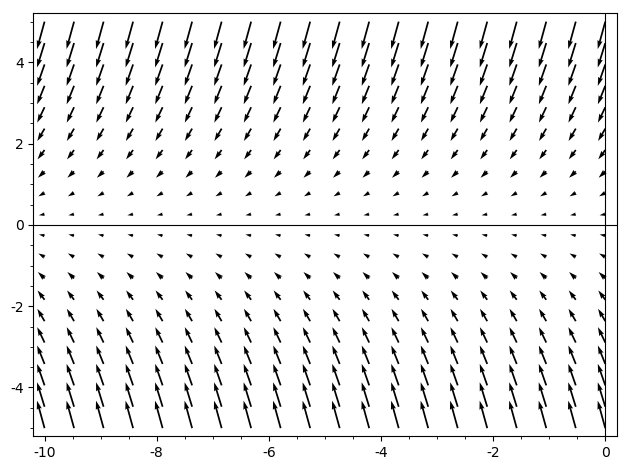

In [138]:
plot_vector_field(f, (x1, -10, 0), (x2, -5, 5))

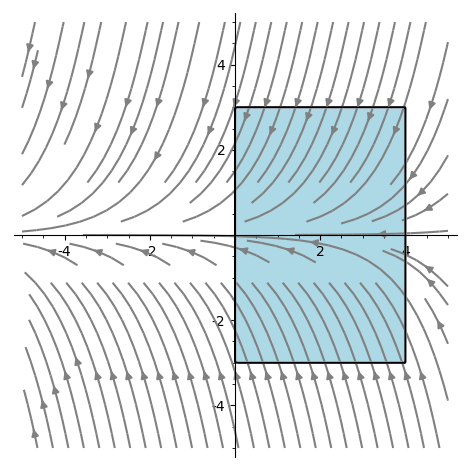

In [139]:
g = Graphics()
g += streamline_plot(tuple(f), (x1, -5, 5), (x2, -5, 5),
                     color="grey")
g += region_plot([SR(x1) >= 0, SR(x2) + 3 >= 0,
                  SR(x2) - 3 <= 0, SR(x1) <= 4],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g

In [140]:
h = [[("GEQ", x1+5)]]; h

[[('GEQ', x1 + 5)]]

In [141]:
s = [[("GEQ", x2 + 3), ("LEQ", x2-3),
      ("GEQ", x1), ("LEQ", x1 - 4)]]
s

[[('GEQ', x2 + 3), ('LEQ', x2 - 3), ('GEQ', x1), ('LEQ', x1 - 4)]]

In [142]:
from_cnf(s)

[x2 + 3 >= 0 /\ x2 - 3 <= 0 /\ x1 >= 0 /\ x1 - 4 <= 0]

In [143]:
in_cnf(f,s)

===
I     = <>
basis = <0>
L[1]  = x2 + 3
---
I     = <x2 + 3>
basis = <x2 + 3>
L[2]  = -x2
---
I     = <x2 + 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x2 - 3
---
I     = <x2 - 3>
basis = <x2 - 3>
L[2]  = -x2
---
I     = <x2 - 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = -1
---
I     = <x1, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 - 4
---
I     = <x1 - 4>
basis = <x1 - 4>
L[2]  = -1
---
I     = <x1 - 4, -1>
basis = <1>
L[3]  = 0
===


[[x2 + 3 > 0 \/ [x2 + 3 = 0 /\ -x2 >= 0]] /\ [x2 - 3 < 0 \/ [x2 - 3 = 0 /\ -x2 <= 0]] /\ [x1 > 0 \/ [x1 = 0 /\ -1 >= 0]] /\ [x1 - 4 < 0 \/ [x1 - 4 = 0 /\ -1 <= 0]]]

In [144]:
lzz(f,h,s)

xys = (x1, x2)
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = -1
---
I     = <x1 + 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = 1
---
I     = <x1 + 5, 1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x2 + 3
---
I     = <x2 + 3>
basis = <x2 + 3>
L[2]  = -x2
---
I     = <x2 + 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x2 - 3
---
I     = <x2 - 3>
basis = <x2 - 3>
L[2]  = -x2
---
I     = <x2 - 3, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = -1
---
I     = <x1, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 - 4
---
I     = <x1 - 4>
basis = <x1 - 4>
L[2]  = -1
---
I     = <x1 - 4, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x2 + 3
---
I     = <x2 + 3>
basis = <x2 + 3>
L[2]  = x2
---
I     = <x2 + 3, x2>
basis = <1>
L[3]  = x2
===
==

False

### Should return true for hyperboloid

In [145]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [146]:
f = vector([-1,-x2]); f

(-1, -x2)

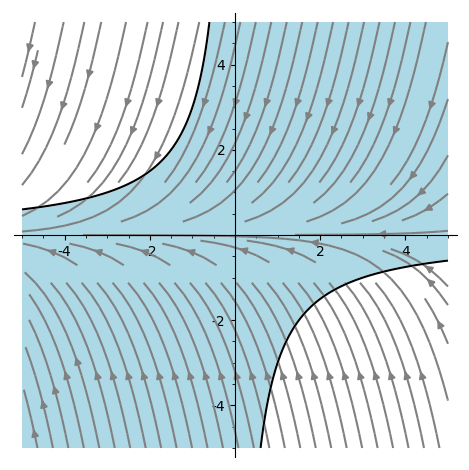

In [147]:
g = Graphics()
g += streamline_plot(tuple(f), (x1, -5, 5), (x2, -5, 5),
                     color="grey")
g += region_plot([SR(x1*x2 + 3) >= 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g

In [148]:
h = [[("GEQ", x1+5), ("LEQ", x1-5), ("GEQ", x2+5), ("LEQ", x1-5)]]; h

[[('GEQ', x1 + 5), ('LEQ', x1 - 5), ('GEQ', x2 + 5), ('LEQ', x1 - 5)]]

In [149]:
s = [[("GT", x1*x2 + 3)]]
s

[[('GT', x1*x2 + 3)]]

In [150]:
from_cnf(s)

x1*x2 + 3 > 0

In [151]:
in_cnf(f,s)

===
I     = <>
basis = <0>
L[1]  = x1*x2 + 3
---
I     = <x1*x2 + 3>
basis = <x1*x2 + 3>
L[2]  = -x1*x2 - x2
---
I     = <x1*x2 + 3, -x1*x2 - x2>
basis = <x1 + 1, x2 - 3>
L[3]  = x1*x2 + 2*x2
---
I     = <x1*x2 + 3, -x1*x2 - x2, x1*x2 + 2*x2>
basis = <1>
L[4]  = -x1*x2 - 3*x2
===


[x1 x2 + 3 > 0 \/ [x1 x2 + 3 = 0 /\ -x1 x2 - x2 > 0] \/ [x1 x2 + 3 = 0 /\ -x1 x2 - x2 = 0 /\ x1 x2 + 2 x2 > 0]]

In [152]:
lzz(f,h,s,debug=True)

xys = (x1, x2)
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = -1
---
I     = <x1 + 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 - 5
---
I     = <x1 - 5>
basis = <x1 - 5>
L[2]  = -1
---
I     = <x1 - 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x2 + 5
---
I     = <x2 + 5>
basis = <x2 + 5>
L[2]  = -x2
---
I     = <x2 + 5, -x2>
basis = <1>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = x1 - 5
---
I     = <x1 - 5>
basis = <x1 - 5>
L[2]  = -1
---
I     = <x1 - 5, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 + 5
---
I     = <x1 + 5>
basis = <x1 + 5>
L[2]  = 1
---
I     = <x1 + 5, 1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1 - 5
---
I     = <x1 - 5>
basis = <x1 - 5>
L[2]  = 1
---
I     = <x1 - 5, 1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x2 + 5
---
I     = <x2 + 5>
basis = <x2 + 5>
L[2]  = x2
---
I     = <x2 + 5, x2>
basis = <1>
L[3]  

((A x1)(A x2)[[[x1 x2 + 3 > 0 /\ [x1 + 5 >= 0 /\ x1 - 5 <= 0 /\ x2 + 5 >= 0 /\ x1 - 5 <= 0] /\ [[x1 + 5 > 0 \/ [x1 + 5 = 0 /\ -1 >= 0]] /\ [x1 - 5 < 0 \/ [x1 - 5 = 0 /\ -1 <= 0]] /\ [x2 + 5 > 0 \/ [x2 + 5 = 0 /\ -x2 >= 0]] /\ [x1 - 5 < 0 \/ [x1 - 5 = 0 /\ -1 <= 0]]]] ==> [x1 x2 + 3 > 0 \/ [x1 x2 + 3 = 0 /\ -x1 x2 - x2 > 0] \/ [x1 x2 + 3 = 0 /\ -x1 x2 - x2 = 0 /\ x1 x2 + 2 x2 > 0]]] /\ [[[~x1 x2 + 3 > 0] /\ [x1 + 5 >= 0 /\ x1 - 5 <= 0 /\ x2 + 5 >= 0 /\ x1 - 5 <= 0] /\ [[x1 + 5 > 0 \/ [x1 + 5 = 0 /\ 1 >= 0]] /\ [x1 - 5 < 0 \/ [x1 - 5 = 0 /\ 1 <= 0]] /\ [x2 + 5 > 0 \/ [x2 + 5 = 0 /\ x2 >= 0]] /\ [x1 - 5 < 0 \/ [x1 - 5 = 0 /\ 1 <= 0]]]] ==> [~[x1 x2 + 3 > 0 \/ [x1 x2 + 3 = 0 /\ x1 x2 + x2 > 0] \/ [x1 x2 + 3 = 0 /\ x1 x2 + x2 = 0 /\ x1 x2 + 2 x2 > 0]]]]],
 FALSE)

### Check y half-plane

In [153]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [154]:
f = vector([-1,-x2]); f

(-1, -x2)

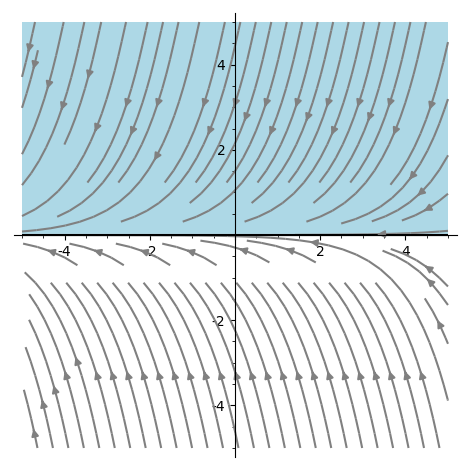

In [155]:
g = Graphics()
g += streamline_plot(tuple(f), (x1, -5, 5), (x2, -5, 5),
                     color="grey")
g += region_plot([SR(x2) > 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g

In [156]:
h = []; h

[]

In [157]:
s = [[("GT", x2)]]
s

[[('GT', x2)]]

In [158]:
lzz(f,h,s,xys=[x2])

xys = [x2]
===
I     = <>
basis = <0>
L[1]  = x2
---
I     = <x2>
basis = <x2>
L[2]  = -x2
===
===
I     = <>
basis = <0>
L[1]  = x2
---
I     = <x2>
basis = <x2>
L[2]  = x2
===
(A x2)[[x2 > 0 ==> x2 > 0] /\ [[~x2 > 0] ==> [~x2 > 0]]]


True

### Check x half-plane

In [159]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [160]:
f = vector([-1,-x2]); f

(-1, -x2)

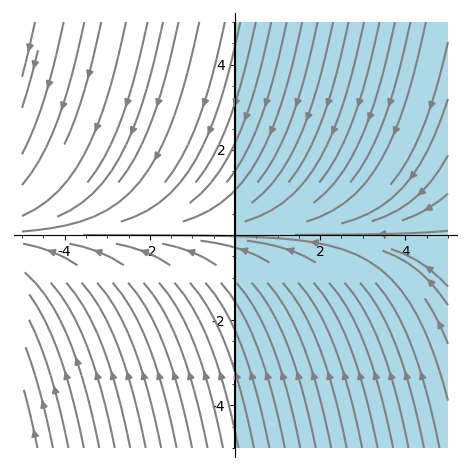

In [161]:
g = Graphics()
g += streamline_plot(tuple(f), (x1, -5, 5), (x2, -5, 5),
                     color="grey")
g += region_plot([SR(x1) > 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g

In [162]:
h = []; h

[]

In [163]:
s = [[("GT", x1)]]
s

[[('GT', x1)]]

In [164]:
lzz(f,h,s,xys=[x1])

xys = [x1]
===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = -1
---
I     = <x1, -1>
basis = <1>
L[3]  = 0
===
===
I     = <>
basis = <0>
L[1]  = x1
---
I     = <x1>
basis = <x1>
L[2]  = 1
---
I     = <x1, 1>
basis = <1>
L[3]  = 0
===
(A x1)[[x1 > 0 ==> [x1 > 0 \/ [x1 = 0 /\ -1 > 0]]] /\ [[~x1 > 0] ==> [~[x1 > 0 \/ [x1 = 0 /\ 1 > 0]]]]]


False

### Parameter synthesis for y half-plane

In [165]:
R.<a,x1,x2> = QQ[]; R

Multivariate Polynomial Ring in a, x1, x2 over Rational Field

In [166]:
f = vector([-1,-x2]); f

(-1, -x2)

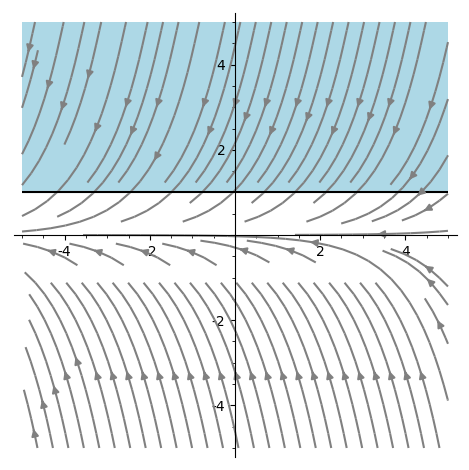

In [167]:
g = Graphics()
g += streamline_plot(tuple(map(SR,f)), (SR(x1), -5, 5), (SR(x2), -5, 5),
                     color="grey")
g += region_plot([SR(x2) - 1 > 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g

In [168]:
h = []; h

[]

In [169]:
s = [[("GT", x2 - a)]]
s

[[('GT', -a + x2)]]

In [170]:
lzz(f,h,s,xys=[x2])

xys = [x2]
===
I     = <>
basis = <0>
L[1]  = -a + x2
---
I     = <-a + x2>
basis = <a - x2>
L[2]  = -x2
---
I     = <-a + x2, -x2>
basis = <a, x2>
L[3]  = x2
===
===
I     = <>
basis = <0>
L[1]  = -a + x2
---
I     = <-a + x2>
basis = <a - x2>
L[2]  = x2
---
I     = <-a + x2, x2>
basis = <a, x2>
L[3]  = x2
===
(A x2)[[-a + x2 > 0 ==> [-a + x2 > 0 \/ [-a + x2 = 0 /\ -x2 > 0]]] /\ [[~-a + x2 > 0] ==> [~[-a + x2 > 0 \/ [-a + x2 = 0 /\ x2 > 0]]]]]


a <= 0

### Synthesis circular invariant

In [171]:
R.<a,x1,x2> = QQ[]; R

Multivariate Polynomial Ring in a, x1, x2 over Rational Field

In [172]:
f = vector([-x1, -x2]); f

(-x1, -x2)

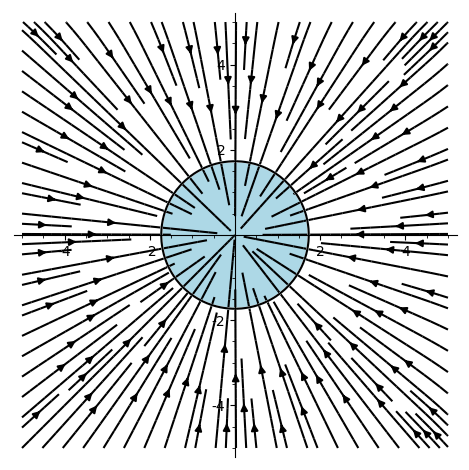

In [173]:
g = Graphics()
g += streamline_plot(tuple(map(SR,f)), (x1, -5, 5), (x2, -5, 5), density=1.5,
                     color="black")
g += region_plot([SR(x1)**2 + SR(x2)**2 - 3 < 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g

In [174]:
h = []; h

[]

In [175]:
s = [[("LT", (x1-a)**2 + (x2-a)**2 - 3)]]
s

[[('LT', 2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3)]]

In [176]:
lzz(f,h,s,xys=[x1,x2])

xys = [x1, x2]
===
I     = <>
basis = <0>
L[1]  = 2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3
---
I     = <2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3>
basis = <a^2 - a*x1 + 1/2*x1^2 - a*x2 + 1/2*x2^2 - 3/2>
L[2]  = 2*a*x1 - 2*x1^2 + 2*a*x2 - 2*x2^2
---
I     = <2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3, 2*a*x1 - 2*x1^2 + 2*a*x2 - 2*x2^2>
basis = <x1^3 - 3*x1^2*x2 + 4*a*x2^2 + x1*x2^2 - 3*x2^3 - 3*x1 - 3*x2, a^2 - 1/2*x1^2 - 1/2*x2^2 - 3/2, a*x1 - x1^2 + a*x2 - x2^2>
L[3]  = -2*a*x1 + 4*x1^2 - 2*a*x2 + 4*x2^2
---
I     = <2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3, 2*a*x1 - 2*x1^2 + 2*a*x2 - 2*x2^2, -2*a*x1 + 4*x1^2 - 2*a*x2 + 4*x2^2>
basis = <a^2 - 3/2, x2^2, x1 + x2>
L[4]  = 2*a*x1 - 8*x1^2 + 2*a*x2 - 8*x2^2
===
===
I     = <>
basis = <0>
L[1]  = 2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3
---
I     = <2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^2 - 3>
basis = <a^2 - a*x1 + 1/2*x1^2 - a*x2 + 1/2*x2^2 - 3/2>
L[2]  = -2*a*x1 + 2*x1^2 - 2*a*x2 + 2*x2^2
---
I     = <2*a^2 - 2*a*x1 + x1^2 - 2*a*x2 + x2^

2 a^2 - 3 <= 0

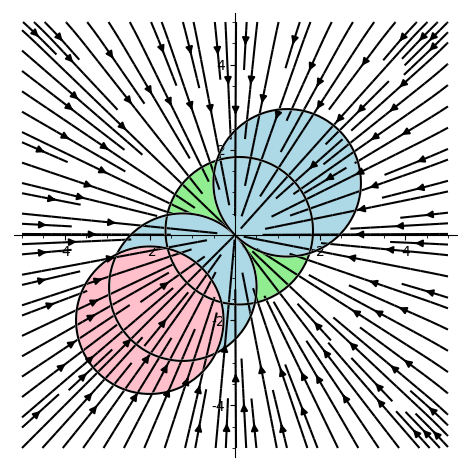

In [177]:
g = Graphics()

g += streamline_plot(tuple(map(SR,f)), (x1, -5, 5), (x2, -5, 5), density=1.5,
                     color="black")
g += region_plot([SR(x1-0.1)**2 + SR(x2-0.1)**2 - 3 < 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightgreen")
g += region_plot([SR(x1+1.5**.5)**2 + SR(x2+1.5**.5)**2 - 3 < 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g += region_plot([SR(x1-1.5**.5)**2 + SR(x2-1.5**.5)**2 - 3 < 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="lightblue")
g += region_plot([SR(x1+2)**2 + SR(x2+2)**2 - 3 < 0],
                 (x1, -5, 5), (x2, -5, 5),bordercol="black",
                 incol="pink")

g

## Example 74: Lyapunov function

In [178]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [179]:
f = vector([-x1, -x2]); f

(-x1, -x2)

In [180]:
V = x1**2 + x2**2; V

x1^2 + x2^2

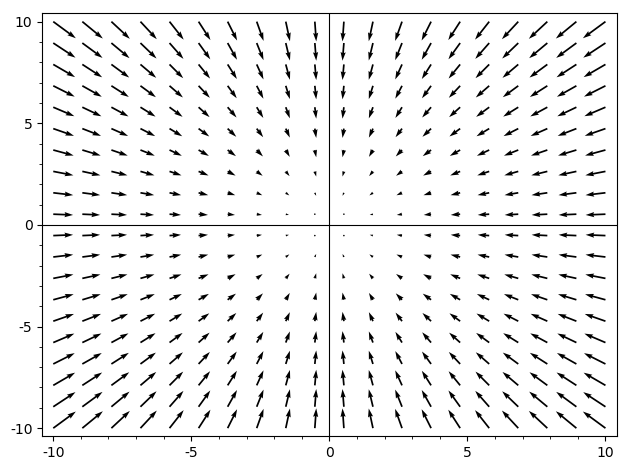

In [181]:
plot_vector_field(f, (x1,-10,10), (x2,-10,10))

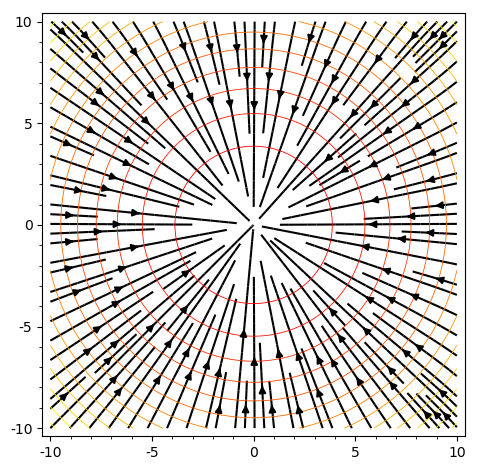

In [182]:
g = Graphics()
g += streamline_plot(tuple(f), (x1, -10, 10), (x2, -10, 10), density=1.5,
                     color="black")
g += contour_plot(SR(V), (x1, -10, 10), (x2, -10, 10), fill=False,
                  cmap="autumn", linewidths=0.6,contours=15)
g

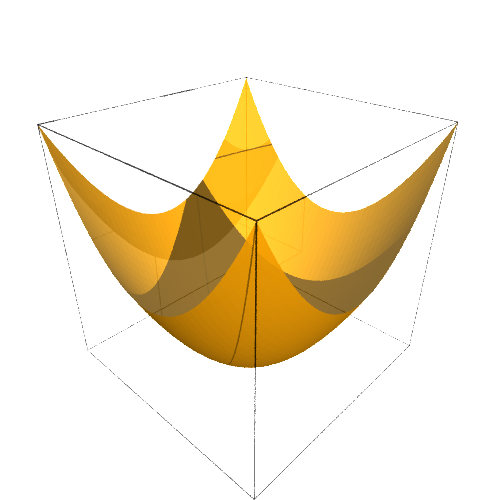

In [183]:
plot3d(V, (x1, -10, 10), (x2, -10, 10),
       aspect_ratio=[1,1,0.1],color="orange",
       opacity=0.9).show(viewer="tachyon")

Check that $V$ is a Lyapunov function:

In [184]:
F = qf.forall([x1,x2], SR(V) >= 0)
qepcad(F)

TRUE

In [185]:
F = qf.forall([x1,x2], qf.iff(SR(V) == 0,
                              qf.and_(SR(x1) == 0, SR(x2) == 0)))
qepcad(F)

TRUE

In [186]:
F = qf.forall([x1,x2], SR(lie(f,V)) <= 0)
qepcad(F)

TRUE

## Example 76

In [187]:
R.<x1,x2> = QQ[]; R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [188]:
f = vector([x2, -x1 + QQ(1/3)*x1^3 - x2]); f

(x2, 1/3*x1^3 - x1 - x2)

In [189]:
B = -13 + 7*x1^2 + 16*x2^2 - 6*x1^2*x2^2 - QQ(7/6)*x1^4 - 3*x1*x2^3 + 12*x1*x2 - 4*x1^3*x2
B

-7/6*x1^4 - 4*x1^3*x2 - 6*x1^2*x2^2 - 3*x1*x2^3 + 7*x1^2 + 12*x1*x2 + 16*x2^2 - 13

In [190]:
x1r, x2r = (x1,-4,4), (x2,-4,4)
plot3d(B, x1r, x2r, color="orange", opacity=0.95,
       aspect_ratio=(1,1,0.003)).show(viewer="threejs")

Graphics3d Object

In [191]:
start = SR((x1 - 1.5)^2 + x2^2) <= 0.25; start

1.00000000000000*x1^2 + 1.00000000000000*x2^2 - 3.00000000000000*x1 + 2.25000000000000 <= 0.250000000000000

In [192]:
unsafe = SR((x1 + 1)^2 + (x2 + 1)^2) <= 0.16; unsafe

x1^2 + x2^2 + 2*x1 + 2*x2 + 2 <= 0.160000000000000

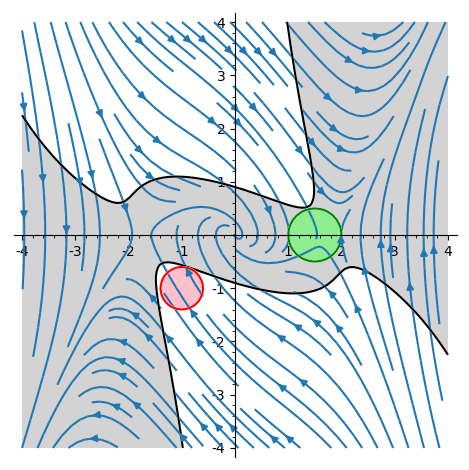

In [193]:
g = Graphics()
g += streamline_plot(tuple(f), x1r, x2r)
g += region_plot(SR(B) <= 0, x1r,x2r,bordercol="black",incol="lightgrey")
g += region_plot(start, x1r, x2r,
                 incol="lightgreen", bordercol="green")
g += region_plot(unsafe, x1r, x2r,
                 incol="pink", bordercol="red")

#g += contour_plot(SR(B), x1r,x2r,fill=False, cmap="coolwarm", contours=20)
g.show()

Check that $B$ is a barrier certificate cam be done via sum of squares arguments (quantifier elimination is not tractable): https://thesis.library.caltech.edu/2155/1/thesis.pdf

## Example 89

In [194]:
R.<x1,x2> = RR[]; R

Multivariate Polynomial Ring in x1, x2 over Real Field with 53 bits of precision

In [195]:
f = vector([x2^2, 2]); f

(x2^2, 2.00000000000000)

In [196]:
S = [SR(x2) >= 0, SR(x1) >= 0]; S

[x2 >= 0, x1 >= 0]

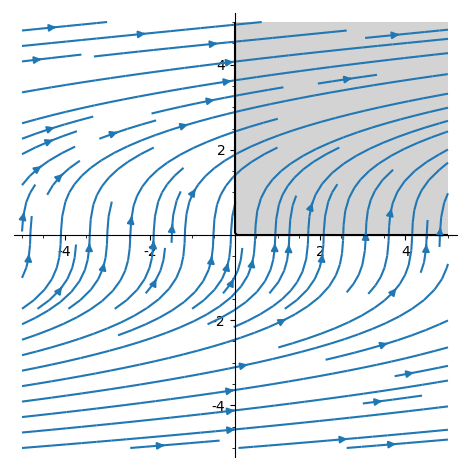

In [197]:
g = Graphics()
x1r, x2r = (x1,-5,5), (x2,-5,5)
g += streamline_plot(tuple(f), x1r, x2r)
g += region_plot(S, x1r, x2r, incol="lightgrey", bordercol="black")
g

We can check invarience of $S$ by differential induction:
$$
    D(S) = \dot{x_1} \geq 0 \wedge \dot{x_2} \geq 0
    \equiv x_2^2 \geq 0 \wedge 2 \geq 0
    \equiv \top
$$

## Hui Kong Examples

### Example 1

In [198]:
R.<u1,u2,u3,u4,u5,u6,x,y> = QQ[]; R

Multivariate Polynomial Ring in u1, u2, u3, u4, u5, u6, x, y over Rational Field

In [199]:
f = vector([y^2, x*y]); f

(y^2, x*y)

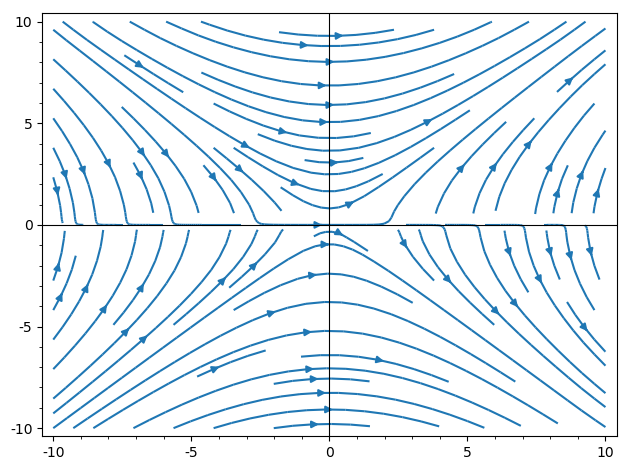

In [200]:
streamline_plot(map(SR, tuple(f)), (x, -10,10), (y,-10,10))

In [201]:
p = u1 - u3*(x**2 - y**2); p

-u3*x^2 + u3*y^2 + u1

In [202]:
var('k')

k

In [203]:
F = qf.exists([k], qf.forall([x,y], SR(lie(f,p)) == k*SR(p))); F

(E k)(A x)(A y)[0 = -(u3 x^2 - u3 y^2 - u1) k]

In [204]:
qepcad(F)

TRUE

In [205]:
lie(f,p).reduce(ideal(p))

0

In [206]:
q = u1 + u2*x**2 + u3*x*y + u4*y**2 + u5*x + u6*y; q

u2*x^2 + u3*x*y + u4*y^2 + u5*x + u6*y + u1

In [207]:
F = qf.exists([k], qf.forall([x,y], SR(lie(f,q)) == k*SR(q))); F

(E k)(A x)(A y)[u3 x^2 y + 2 u2 x y^2 + 2 u4 x y^2 + u3 y^3 + u6 x y + u5 y^2 = (u2 x^2 + u3 x y + u4 y^2 + u5 x + u6 y + u1) k]

In [208]:
#qepcad(F) # does not work

In [209]:
r = lie(f,q).reduce(ideal(q)); r

u3*x^2*y + 2*u2*x*y^2 + 2*u4*x*y^2 + u3*y^3 + u6*x*y + u5*y^2

In [210]:
solve(SR(r) == 0, [SR(u1),SR(u2),SR(u3),SR(u4),SR(u5)])

[[u1 == r3, u2 == r6, u3 == r5, u4 == r4, u5 == -(r5*x^2 + 2*(r4 + r6)*x*y + r5*y^2 + u6*x)/y]]

In [211]:
F = qf.forall([x,y], SR(r) == 0); F

(A x)(A y)[u3 x^2 y + 2 u2 x y^2 + 2 u4 x y^2 + u3 y^3 + u6 x y + u5 y^2 = 0]

In [212]:
sln = qepcad(F); sln

u3 = 0 /\ u4 + u2 = 0 /\ u5 = 0 /\ u6 = 0

In [213]:
slns = map(eval, str(sln).replace('= 0','').split(' /\ ')); slns

[u3, u2 + u4, u5, u6]

In [214]:
[SR(s) == 0 for s in slns]

[u3 == 0, u2 + u4 == 0, u5 == 0, u6 == 0]

In [215]:
solve([SR(s) == 0 for s in slns], [SR(u3),SR(u4),SR(u5),SR(u6)])

[[u3 == 0, u4 == -u2, u5 == 0, u6 == 0]]

In [216]:
L = QQ['u1,u2,u3,u4,u5,u6']['x,y']

In [217]:
L(r).coefficients()

[u3, 2*u2 + 2*u4, u3, u6, u5]

### Example 2

In [218]:
inclass = solve([SR(s) == 0 for s in slns] + [SR(q.substitute(x=4,y=2))],
                [SR(u1),SR(u3),SR(u3),SR(u4),SR(u5),SR(u6)])
inclass

[[u1 == -12*u2, u3 == 0, u4 == -u2, u5 == 0, u6 == 0]]

In [219]:
inv = SR(q).substitute(inclass); inv

u2*x^2 - u2*y^2 - 12*u2

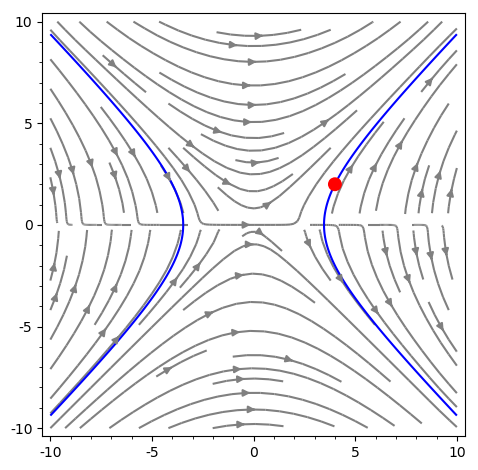

In [220]:
g = Graphics()
g += streamline_plot(map(SR, tuple(f)), (x, -10,10), (y,-10,10),
                     color="grey")
g += implicit_plot(inv.substitute(u2=1) == 0,
                   (x, -10,10), (y,-10,10))
g += points((4,2), size=100, color="red", zorder=10)
g